# Battery
* http://www.206xs.com/topics/battery/iontd2e.pdf
* https://secondlifestorage.com/showthread.php?tid=1855

<IPython.core.display.Javascript object>


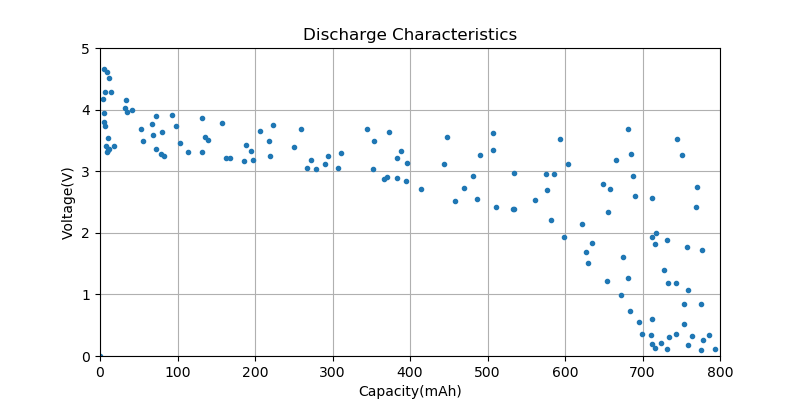

In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0], '.')  # empty line
linebuilder = LineBuilder(line)
plt.rcParams['figure.figsize'] = (8, 4)
plt.xlabel('Capacity(mAh)')
plt.ylabel('Voltage(V)')
plt.title('Discharge Characteristics')
plt.xlim(0,800)
plt.ylim(0,5)
plt.grid(True)

plt.show()


<IPython.core.display.Javascript object>


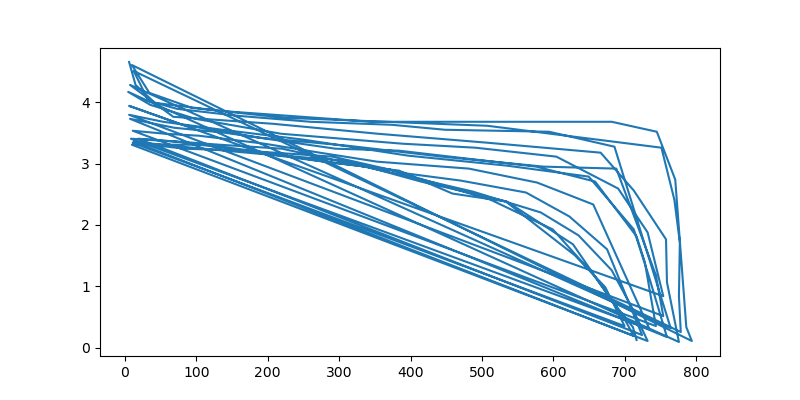

In [3]:
plt.plot(linebuilder.xs[1:],linebuilder.ys[1:])

In [4]:
import pandas as pd
df=pd.DataFrame({'voltage':linebuilder.ys[1:],'cap':linebuilder.xs[1:]})
df['cycle']=df.index//10*100
df.head(20)
df.to_csv('temp.csv')
df=pd.read_csv('temp.csv',index_col=0)

<IPython.core.display.Javascript object>


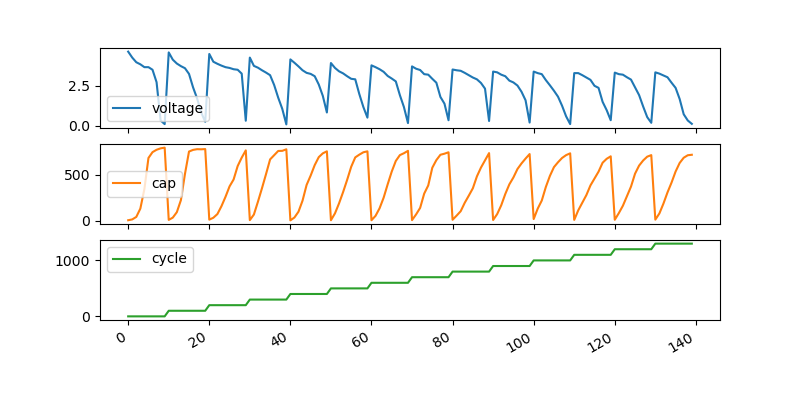

In [5]:
ax=df.plot(subplots=True)